# Data Preprocessing and Exploratory Data Analysis

### Getting Ready

Importing libraries and setting some variables

In [71]:
import pandas as pd
import numpy as np
import ast
import glob
import matplotlib.pyplot as plt
import seaborn as sns

RATING_THRESHOLD = 1000

Preprocessing function

In [2]:
def preprocess_df(df):
    df = df.copy()
    # Dropping missing values in essential columns
    df.dropna(subset=['author', 'summary', 'genres'], inplace=True)

    # Dropping unnecessary columns
    df.drop(columns=['about_author', 'community_reviews', 'kindle_price', 'num_reviews', 'id'], inplace=True)

    # Converting 'author' from string representation of list to actual list and extracting the first author
    df['author'] = df['author'].apply(lambda x: ast.literal_eval(x)[0])

    # There are some authors with no name or unknown names, we can filter them out
    na_authors = ['Anonymous', 'Unknown', 'Various']
    df = df[~df['author'].isin(na_authors)]

    # Dropping rows with missing or insignificant summaries
    df = df[~df['summary'].str.len() < 75]

    # Converting 'genres' from string representation of list to actual list and joining them into a single string
    df['genres'] = df['genres'].apply(lambda x: " ".join(ast.literal_eval(x)))

    # Utilizing 'w_rating' (weighted rating) that makes 'star_rating' more valuable when more people ('num_ratings') do rate it
    # Also setting a threshold for 'num_ratings' to filter out books with too few ratings
    df = df[df['num_ratings'] > RATING_THRESHOLD]
    df['w_rating'] = (df['num_ratings'] / (df['num_ratings'] + RATING_THRESHOLD) * df['star_rating'] +
                  RATING_THRESHOLD / (df['num_ratings'] + RATING_THRESHOLD) * df['star_rating'].mean()).round(2)

    # Adding a new column 'tags' that combines genres, author, and summary for better searchability
    df['tags'] = df['genres'].str.lower() + ' ' \
        + df['author'].str.lower().replace(' ', '') + ' ' \
        + df['summary'].str.lower()
    
    # Clean up punctuation
    df['tags'] = df['tags'].str.replace(r'[^\w\s]', '', regex=True).str.replace(r'\s+', ' ', regex=True)
    
    return df

### 1. Data Preprocessing stage

Detecting all `.parquet` files

In [3]:
parquet_files = glob.glob('../datasets/*.parquet')

Preprocessing all `.parquet` files and appending to the `result` DataFrame.

In [ ]:
# result = pd.DataFrame()
# for file in parquet_files:
#     print(f"Processing file: {file}")
#     result = pd.concat([result, pre(pd.read_parquet(file))], ignore_index=True)

Processing file: ../datasets\0000.parquet
Processing file: ../datasets\0001.parquet
Processing file: ../datasets\0002.parquet
Processing file: ../datasets\0003.parquet
Processing file: ../datasets\0004.parquet
Processing file: ../datasets\0005.parquet
Processing file: ../datasets\0006.parquet
Processing file: ../datasets\0007.parquet
Processing file: ../datasets\0008.parquet
Processing file: ../datasets\0009.parquet


Resetting index

In [ ]:
#result.reset_index(drop=True, inplace=True)

Saving the `result` DataFrame

In [ ]:
#result.to_parquet('../datasets/processed_books.parquet', index=False)

Loading the `result` DataFrame

In [270]:
df = pd.read_parquet('../datasets/processed_books.parquet')
df.head()

,url,name,author,star_rating,num_ratings,summary,genres,first_published,w_rating,tags
0,https://www.goodreads.com/book/show/75634.Next...,Next Man Up: A Year Behind the Lines in Today'...,John Feinstein,3.96,4053.0,"In the NFL there is only one that every day, ...",Sports Football Nonfiction Journalism Biography,1/1/2005,3.96,sports football nonfiction journalism biograph...
1,https://www.goodreads.com/book/show/13626818-m...,Molly's Lips: Club Mephisto Retold,Annabel Joseph,3.91,1821.0,When Mephisto’s friend Clayton is called out o...,BDSM Erotica Romance Contemporary Romance Dark...,5/14/2012,3.93,bdsm erotica romance contemporary romance dark...
2,https://www.goodreads.com/book/show/28856617-a...,All Aboard,Cressida McLaughlin,3.93,1040.0,The Canal Boat Cafe is a warm and touching sto...,Chick Lit Fiction Romance British Literature,2/4/2016,3.95,chick lit fiction romance british literature c...
3,https://www.goodreads.com/book/show/558007.Dan...,Dance with the Devil: A Memoir of Murder and Loss,David Bagby,4.03,1029.0,Immortalized in the spellbinding documentary D...,True Crime Nonfiction Memoir Crime Biography A...,1/1/2007,4.00,true crime nonfiction memoir crime biography a...
4,https://www.goodreads.com/book/show/670810.The...,The Lost Princess,George MacDonald,4.28,1394.0,"An enchanting, unforgettable fairy tale about ...",Fantasy Classics Fiction Childrens Fairy Tales...,1/1/1875,4.15,fantasy classics fiction childrens fairy tales...


### 2. Data Analysis with the whole processed dataset

Top 10 Rated books

In [213]:
df.sort_values(by='w_rating', ascending=False).head(10).loc[:, ['name', 'w_rating']]

,name,w_rating
75936,The Complete Calvin and Hobbes,4.79
32329,Words of Radiance,4.76
16014,"Words of Radiance, Part 2",4.74
57242,Light Bringer,4.73
56911,"Harry Potter Boxed Set, Books 1-5",4.72
64022,It's a Magical World,4.70
7654,Toda Mafalda,4.70
13517,The Warden and the Wolf King,4.70
33307,The Heroes of Olympus Books 1-4 CD Audiobook B...,4.69
12619,Harry Potter And The Half-Blood Prince,4.69


Top 10 Popular books

In [103]:
df.sort_values(by='num_ratings', ascending=False).head(10).loc[:, ['name', 'num_ratings']]

,name,num_ratings
23191,Harry Potter and the Sorcerer’s Stone,10185493.0
75835,Twilight,6653266.0
78997,To Kill a Mockingbird,6205244.0
30862,The Great Gatsby,5299600.0
59003,The Fault in Our Selves: An Examination of Ame...,5203422.0
49302,The Great Gatsby,5132063.0
56446,1984,4677735.0
36406,Harry Potter and the Prisoner of Azkaban,4250586.0
65021,Pride and Prejudice,4186157.0
17724,Harry Potter and the Chamber of Secrets,3982918.0


Top 10 Oldest books

In [50]:
df['first_published'] = pd.to_datetime(df['first_published'], errors='coerce')

In [102]:
df.sort_values(by='first_published').head(10).loc[:, ['name', 'first_published']]

,name,first_published
76226,The Holy War,1678-08-08
59877,Narrative of the Captivity and Restoration of ...,1682-01-01
65127,The Glory of Christ,1683-01-01
29268,"Pilgrim's Progress, Part 2: Christiana",1685-01-01
23234,Discourse on Metaphysics and Other Essays,1686-01-01
65005,Les Caractères,1687-01-01
52876,The Principia : Mathematical Principles of Nat...,1687-07-01
17353,A Letter Concerning Toleration,1689-01-01
71742,Two Treatises of Government,1689-01-01
16187,The Second Treatise of Government/A Letter Con...,1689-01-01


Top 10 Newest books

In [101]:
df.sort_values(by='first_published', ascending=False).head(10).loc[:, ['name', 'first_published']]

,name,first_published
15286,On the Shortness of Life: Life Is Long if You ...,2049-01-01
11906,The Civil War,2048-01-01
44641,On the Good Life,2047-01-01
3287,The Nature of the Gods,2046-01-01
67693,L'amicizia,2046-01-01
5770,L'amicizia,2046-01-01
76954,On Duties,2045-01-01
34622,Bellum Catilinae,2044-01-01
43100,On Anger,2041-01-01
9387,You Said Forever,2035-01-01


Top 10 Authors by the amount of books

<Axes: ylabel='author'>

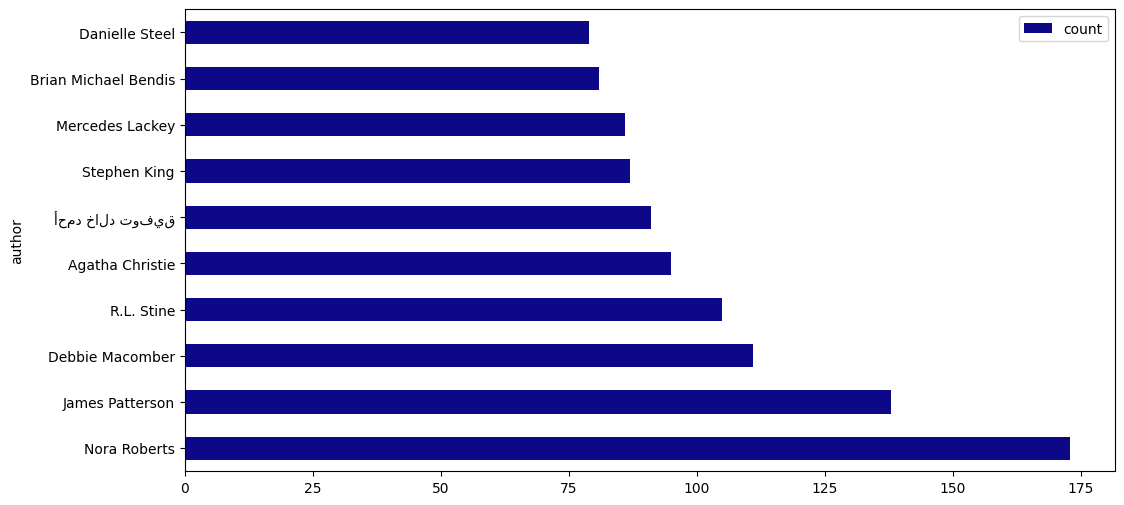

In [96]:
pd.DataFrame(df['author'].value_counts()).head(10).plot(kind='barh', colormap='plasma', figsize=(12, 6))

Top 10 Most successful Authors (by `w_rating`)

In [95]:
df.groupby('author').agg({'w_rating': 'mean'}).sort_values(by='w_rating', ascending=False).head(10)

,w_rating
author,
Nicholas Hooper,4.690000
Mustafa Kemal Atatürk,4.670000
John Williams,4.660000
Paul Simpson,4.640000
Anthony Ray Hinton,4.640000
Martin Kleppmann,4.630000
Bryan Stevenson,4.630000
Alena Mornštajnová,4.610000
Jude Fisher,4.610000


Top 10 Years with the most published books

<Axes: ylabel='year'>

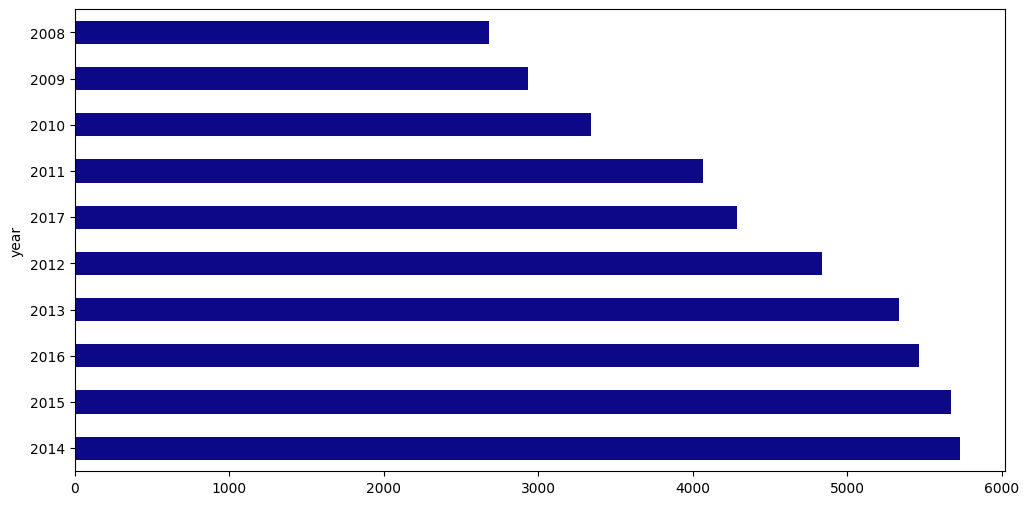

In [93]:
df['year'] = df[~df['first_published'].isna()]['first_published'].dt.year.astype(str)
df.groupby('year').count().sort_values(by='name', ascending=False)['name'].head(10).plot(kind='barh', colormap='plasma', figsize=(12, 6))

Top 10 Popular genres

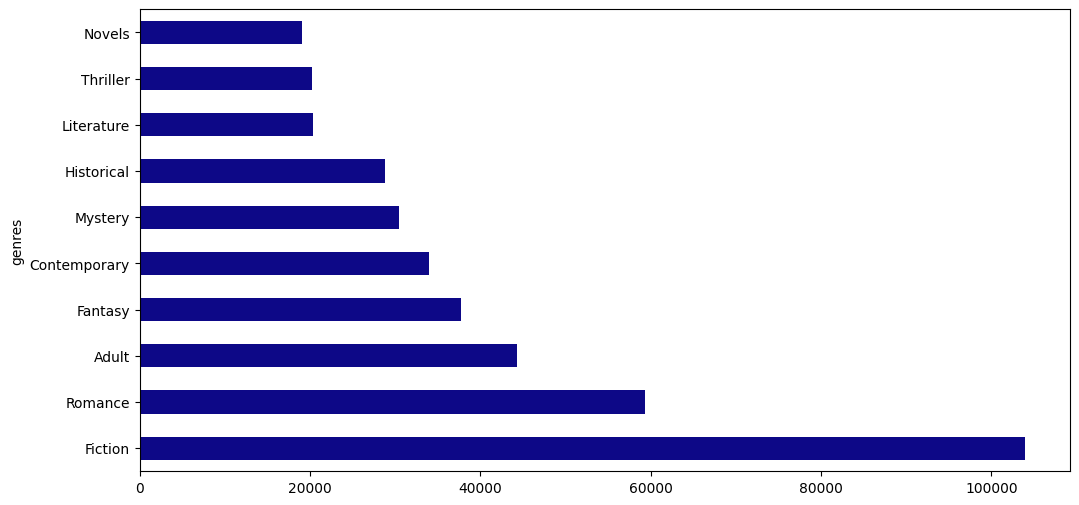

In [ ]:
df['genres'].str.split(' ').explode().value_counts().head(10).plot(kind='barh', colormap='plasma', figsize=(12, 6));

Top 10 Successful Genres (by `w_rating`)

In [172]:
df['genres_split'] = df['genres'].str.split()
pd.DataFrame(df.explode('genres_split').groupby('genres_split')['w_rating'].mean().sort_values(ascending=False).head(10).round(2))

,w_rating
genres_split,
Gemstones,4.32
Field,4.30
Therapy,4.27
Physical,4.27
Computation,4.26
Scripture,4.25
Burkina,4.25
Faso,4.25
Cartoon,4.25


Most Popular Genre each year

In [181]:
genres_each_year = df.explode('genres_split').groupby(['genres_split', 'year']).agg({'name': 'count'}).reset_index().sort_values(by='name', ascending=False).groupby('year').first().sort_values(by='year', ascending=False)

In [187]:
genres_each_year.iloc[9:20]

,genres_split,name
year,,
2025,Fiction,2
2024,Fiction,8
2023,Fiction,29
2022,Fiction,25
2021,Fiction,60
2020,Fiction,92
2019,Fiction,227
2018,Fiction,1202
2017,Fiction,5154


In [188]:
genres_each_year.tail(10)

,genres_split,name
year,,
1700,Literature,2
1697,Fiction,4
1692,Christian,2
1689,Philosophy,3
1687,Literature,2
1686,Philosophy,1
1685,Christian,3
1683,Christian,3
1682,Biography,2


Most Successful Authors each Year

In [201]:
authors_each_year = df.groupby(['author', 'year']).agg({'w_rating': 'mean'}).reset_index().sort_values(by='w_rating', ascending=False).groupby('year').first().sort_values(by='year', ascending=False)

In [202]:
authors_each_year[9:40]

,author,w_rating
year,,
2025,NaRae Lee,4.290
2024,Jasper Fforde,4.380
2023,Pierce Brown,4.730
2022,Ron Schwab,4.310
2021,James S.A. Corey,4.530
2020,Rick Riordan,4.490
2019,James S.A. Corey,4.560
2018,Anthony Ray Hinton,4.640
2017,Robin Hobb,4.630


In [203]:
authors_each_year.tail(10)

,author,w_rating
year,,
1700,William Congreve,3.440000
1697,Charles Perrault,3.916667
1692,Brother Lawrence,4.310000
1689,John Locke,3.863333
1687,Isaac Newton,4.190000
1686,Gottfried Wilhelm von Leibniz,3.930000
1685,Jim Pappas,4.020000
1683,John Owen,4.320000
1682,Mary Rowlandson,3.130000
